# 1️⃣ Initial Data Understanding (Completed)

## Dataset size
Rows: 541,909 transactions
Columns: 8

Time-based data: InvoiceDate ✅ (critical for cohort analysis)

## Key observations
CustomerID has missing values (~135k rows)
InvoiceDate is currently a string, not datetime
Transactions appear to be line-item level, not customer-level
Multiple products per invoice → normal for e-commerce data

### This structure is perfect for building time-based customer cohorts.

## 📌 Cell 1: Import Libraries & Load Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:.2f}".format)

# Load dataset
file_path = "Dataset_ecommerce.csv"   # adjust path if needed
df = pd.read_csv(r"C:\Users\elsingy\Documents\AMDARI DS\cohort\Dataset_ecommerce.csv")


In [5]:
# Shape of dataset
df.shape

(541909, 8)

In [6]:
# Data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
# Preview data
df


,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.00,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.00,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.00,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.00,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.00,SC2149,Toys,50,38.83,Rwanda
...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680.00,SC5440,Furniture,25,36.53,Mozambique
541905,581587,2011-12-09 12:50:00,12680.00,SC3576,Cloths,94,90.65,Tunisia
541906,581587,2011-12-09 12:50:00,12680.00,SC5283,Furniture,14,40.07,Somalia
541907,581587,2011-12-09 12:50:00,12680.00,SC1099,Cosmetics,45,79.83,Senegal


# 📌 Cell 3: Convert InvoiceDate to Datetime

In [11]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [12]:
# Confirm conversion
df["InvoiceDate"].dtype

dtype('<M8[ns]')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   InvoiceDate  541909 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    541909 non-null  object        
 4   Description  541909 non-null  object        
 5   Quantity     541909 non-null  int64         
 6   UnitPrice    541909 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# 📌 Cell 4: Descriptive Statistics

In [14]:
# Numerical + categorical summary
df.describe(include="all")

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.00,541909,541909,541909.00,541909.00,541909
unique,25900,NaN,NaN,9000,10,NaN,NaN,28
top,573585,NaN,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,NaN,NaN,96,54765,NaN,NaN,19651
mean,NaN,2011-07-04 13:34:57.156386048,15287.69,NaN,NaN,50.53,50.48,NaN
min,NaN,2010-12-01 08:26:00,12346.00,NaN,NaN,1.00,1.00,NaN
25%,NaN,2011-03-28 11:34:00,13953.00,NaN,NaN,26.00,25.75,NaN
50%,NaN,2011-07-19 17:17:00,15152.00,NaN,NaN,51.00,50.43,NaN
75%,NaN,2011-10-19 11:27:00,16791.00,NaN,NaN,76.00,75.18,NaN
max,NaN,2011-12-09 12:50:00,18287.00,NaN,NaN,100.00,100.00,NaN


# 📌 Cell 5: Missing Values Analysis

In [15]:
# Count missing values per column
df.isna().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [16]:
# Percentage of missing CustomerID
df["CustomerID"].isna().mean() * 100

np.float64(24.926694334288598)

# 📌 Cell 6: Duplicate Records Check

In [17]:
# Number of exact duplicate rows
df.duplicated().sum()

np.int64(0)

# 📌 Cell 7: Cancellation Analysis

In [18]:
# Identify cancelled invoices (InvoiceNo starting with 'C')
cancelled_transactions = df[df["InvoiceNo"].astype(str).str.startswith("C")]

# Count cancellations
cancelled_transactions.shape[0]

9288

# 📌 Cell 8: Quantity & Price Validation

In [19]:
# Negative or zero quantities
df[df["Quantity"] <= 0].shape[0]

0

In [20]:
# Negative or zero prices
df[df["UnitPrice"] <= 0].shape[0]

0

# 📌 Cell 9: Clean the Dataset (Final Clean Version)

In [21]:
# Remove rows with missing CustomerID
df_clean = df.dropna(subset=["CustomerID"])

# Remove cancelled invoices
df_clean = df_clean[~df_clean["InvoiceNo"].astype(str).str.startswith("C")]

# Reset index
df_clean.reset_index(drop=True, inplace=True)

# Confirm cleaning
df_clean.shape

(397924, 8)

# 📌 Cell 10: Create Cohort Features

In [22]:
# Create Invoice Month
df_clean["InvoiceMonth"] = df_clean["InvoiceDate"].dt.to_period("M")

# Determine Cohort Month (first purchase month per customer)
df_clean["CohortMonth"] = (
    df_clean.groupby("CustomerID")["InvoiceMonth"]
    .transform("min")
)

# 📌 Cell 11: Create Cohort Index (Months Since First Purchase)

In [23]:
def cohort_index(df):
    year_diff = df["InvoiceMonth"].dt.year - df["CohortMonth"].dt.year
    month_diff = df["InvoiceMonth"].dt.month - df["CohortMonth"].dt.month
    return year_diff * 12 + month_diff + 1

df_clean["CohortIndex"] = cohort_index(df_clean)

In [24]:
df_clean.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,2010-12-01 08:26:00,17850.00,SC1734,Electronics,65,10.23,Egypt,2010-12,2010-12,1
1,536365,2010-12-01 08:26:00,17850.00,SC2088,Furniture,95,19.61,Mali,2010-12,2010-12,1
2,536365,2010-12-01 08:26:00,17850.00,SC3463,Books,78,61.49,Mali,2010-12,2010-12,1
3,536365,2010-12-01 08:26:00,17850.00,SC6228,Toys,15,24.73,South Africa,2010-12,2010-12,1
4,536365,2010-12-01 08:26:00,17850.00,SC2149,Toys,50,38.83,Rwanda,2010-12,2010-12,1


# 📌 Cell 12: Build Cohort Retention Table

In [30]:
# Count unique customers per cohort and cohort index
cohort_data = (
    df_clean
    .groupby(["CohortMonth", "CohortIndex"])["CustomerID"]
    .nunique()
    .reset_index()
)

# Pivot table
cohort_table = cohort_data.pivot(
    index="CohortMonth",
    columns="CohortIndex",
    values="CustomerID"
)

cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,885.00,324.00,286.00,340.00,321.00,352.00,321.00,309.00,313.00,350.00,331.00,445.00,235.00
2011-01,417.00,92.00,111.00,96.00,134.00,120.00,103.00,101.00,125.00,136.00,152.00,49.00,NaN
2011-02,380.00,71.00,71.00,108.00,103.00,94.00,96.00,106.00,94.00,116.00,26.00,NaN,NaN
2011-03,452.00,68.00,114.00,90.00,101.00,76.00,121.00,104.00,126.00,39.00,NaN,NaN,NaN
2011-04,300.00,64.00,61.00,63.00,59.00,68.00,65.00,78.00,22.00,NaN,NaN,NaN,NaN
2011-05,284.00,54.00,49.00,49.00,59.00,66.00,75.00,27.00,NaN,NaN,NaN,NaN,NaN
2011-06,242.00,42.00,38.00,64.00,56.00,81.00,23.00,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.00,34.00,39.00,42.00,51.00,21.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.00,35.00,42.00,41.00,21.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 📌 Cell 13: Calculate Retention Rates

In [31]:
# Divide by cohort size (month 1)
retention_table = cohort_table.divide(cohort_table.iloc[:, 0], axis=0)

retention_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,1.00,0.37,0.32,0.38,0.36,0.40,0.36,0.35,0.35,0.40,0.37,0.50,0.27
2011-01,1.00,0.22,0.27,0.23,0.32,0.29,0.25,0.24,0.30,0.33,0.36,0.12,NaN
2011-02,1.00,0.19,0.19,0.28,0.27,0.25,0.25,0.28,0.25,0.31,0.07,NaN,NaN
2011-03,1.00,0.15,0.25,0.20,0.22,0.17,0.27,0.23,0.28,0.09,NaN,NaN,NaN
2011-04,1.00,0.21,0.20,0.21,0.20,0.23,0.22,0.26,0.07,NaN,NaN,NaN,NaN
2011-05,1.00,0.19,0.17,0.17,0.21,0.23,0.26,0.10,NaN,NaN,NaN,NaN,NaN
2011-06,1.00,0.17,0.16,0.26,0.23,0.33,0.10,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.00,0.18,0.21,0.22,0.27,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.00,0.21,0.25,0.24,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 📌 Cell 14: Retention Heatmap (Optional Visualization)

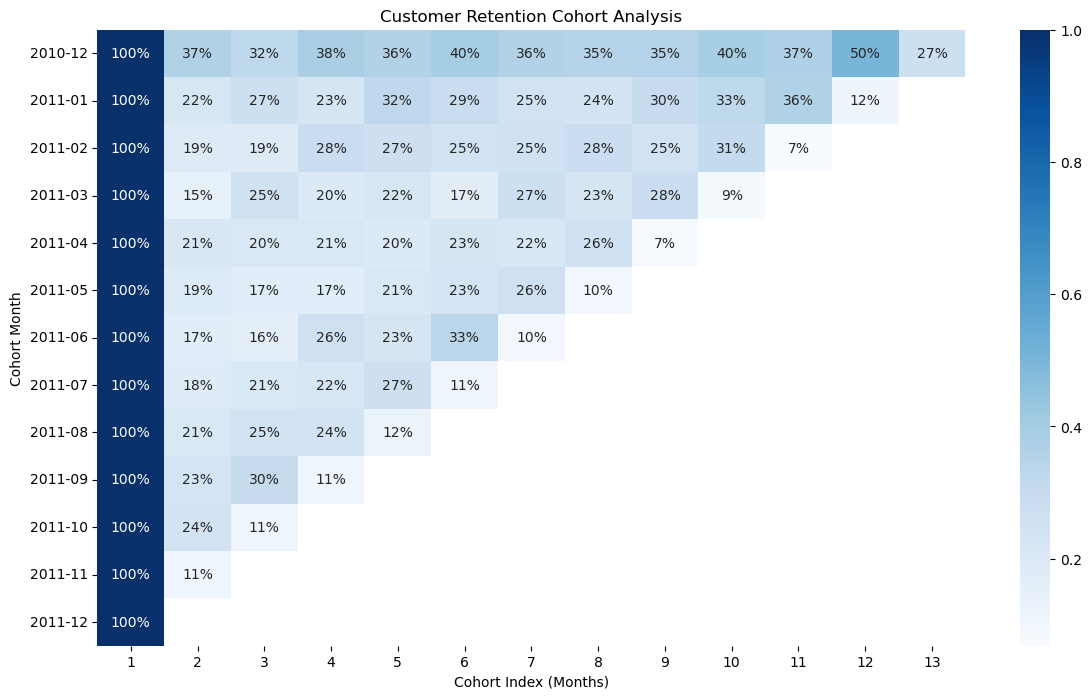

In [32]:
plt.figure(figsize=(14, 8))
sns.heatmap(
    retention_table,
    annot=True,
    fmt=".0%",
    cmap="Blues"
)
plt.title("Customer Retention Cohort Analysis")
plt.ylabel("Cohort Month")
plt.xlabel("Cohort Index (Months)")
plt.show()

# 🔄 Churn Analysis (Numerical-Only Visualizations)
## 📌 What is Churn in This Project?

#### A customer is considered churned if they do not return in subsequent months after their first purchase.

##### We’ll analyze churn in two complementary ways:

1. Retention-based churn (1 − retention rate)

2. Customer lifetime (tenure) distribution

# 📌 Cell 15: Churn Rate from Retention Table (Numerical)

In [33]:
# Churn rate is the complement of retention
churn_table = 1 - retention_table

churn_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,0.00,0.63,0.68,0.62,0.64,0.60,0.64,0.65,0.65,0.60,0.63,0.50,0.73
2011-01,0.00,0.78,0.73,0.77,0.68,0.71,0.75,0.76,0.70,0.67,0.64,0.88,NaN
2011-02,0.00,0.81,0.81,0.72,0.73,0.75,0.75,0.72,0.75,0.69,0.93,NaN,NaN
2011-03,0.00,0.85,0.75,0.80,0.78,0.83,0.73,0.77,0.72,0.91,NaN,NaN,NaN
2011-04,0.00,0.79,0.80,0.79,0.80,0.77,0.78,0.74,0.93,NaN,NaN,NaN,NaN
2011-05,0.00,0.81,0.83,0.83,0.79,0.77,0.74,0.90,NaN,NaN,NaN,NaN,NaN
2011-06,0.00,0.83,0.84,0.74,0.77,0.67,0.90,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,0.00,0.82,0.79,0.78,0.73,0.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,0.00,0.79,0.75,0.76,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### This (above result) gives month-over-month churn per cohort.

# 📌 Cell 16: Average Churn Rate by Cohort Index (Numerical Summary)

In [36]:
avg_churn_by_month = churn_table.mean(axis=0)

avg_churn_by_month

CohortIndex
1    0.00
2    0.79
3    0.78
4    0.77
5    0.75
6    0.75
7    0.76
8    0.76
9    0.75
10   0.72
11   0.73
12   0.69
13   0.73
dtype: float64

## 📌 This tells us:

### Which month experiences the highest churn

#### Where retention efforts should focus

# 📊 Numerical Visualization 1: Average Churn Over Time

### ✔ Numerical data only
### ✔ Continuous metric
### ✔ Time-based trend

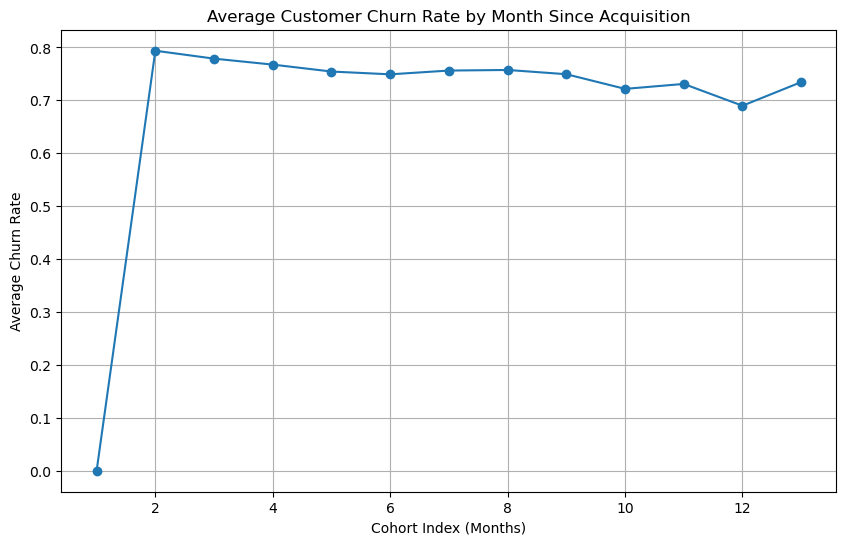

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(avg_churn_by_month.index, avg_churn_by_month.values, marker="o")
plt.title("Average Customer Churn Rate by Month Since Acquisition")
plt.xlabel("Cohort Index (Months)")
plt.ylabel("Average Churn Rate")
plt.grid(True)
plt.show()

## 🔍 Insight You’ll Look For

#### - Sharp churn in Month 2 or 3 → onboarding or early experience issue

#### - Gradual churn → normal lifecycle decay

# 📌 Cell 17: Customer Tenure Calculation

In [38]:
customer_tenure = (
    df_clean
    .groupby("CustomerID")["CohortIndex"]
    .max()
)

customer_tenure.describe()
# Tenure = number of months a customer stays active.

count   4339.00
mean       5.26
std        4.31
min        1.00
25%        1.00
50%        4.00
75%        9.00
max       13.00
Name: CohortIndex, dtype: float64

# 📊 Numerical Visualization 2: Customer Tenure Distribution

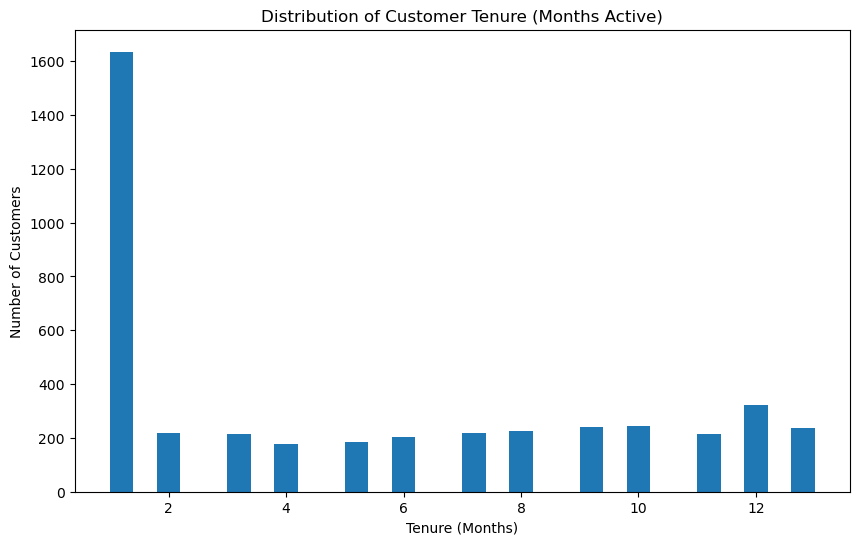

In [41]:
plt.figure(figsize=(10, 6))
plt.hist(customer_tenure, bins=30)
plt.title("Distribution of Customer Tenure (Months Active)")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.show()

##🔍 Insight You’ll Look For

### - Heavy right-skew → many short-lived customers

### - tail → loyal customer base exists

# 📌 Cell 18: Early vs Late Churn Classification (Numerical Feature)

In [42]:
# Define early churn (≤ 3 months)
customer_churn_type = pd.DataFrame({
    "CustomerID": customer_tenure.index,
    "Tenure": customer_tenure.values,
})

customer_churn_type["ChurnCategory"] = np.where(
    customer_churn_type["Tenure"] <= 3,
    "Early Churn",
    "Late / Retained"
)

customer_churn_type["Tenure"].describe()

count   4339.00
mean       5.26
std        4.31
min        1.00
25%        1.00
50%        4.00
75%        9.00
max       13.00
Name: Tenure, dtype: float64

# 📊 Numerical Visualization 3: Revenue vs Tenure (Optional but Powerful)

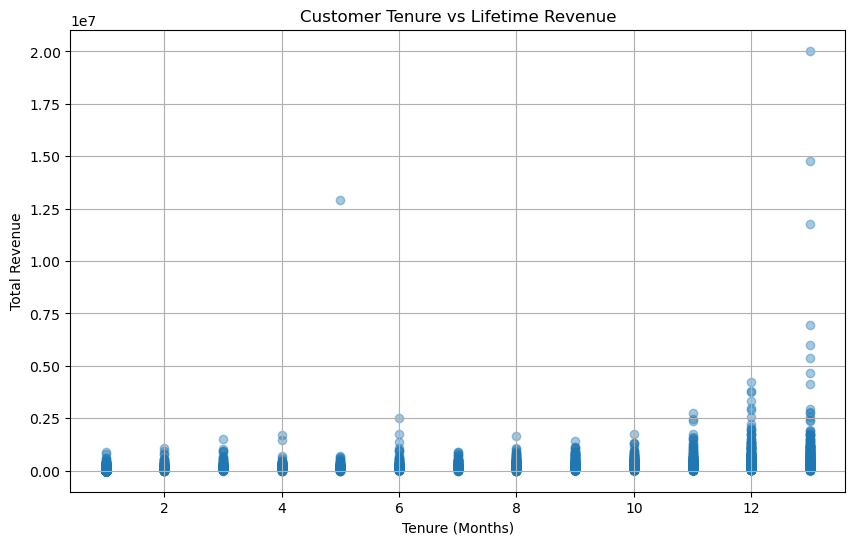

In [43]:
# Create revenue column
df_clean["Revenue"] = df_clean["Quantity"] * df_clean["UnitPrice"]

customer_revenue = (
    df_clean
    .groupby("CustomerID")["Revenue"]
    .sum()
)

churn_revenue_df = customer_churn_type.merge(
    customer_revenue,
    on="CustomerID",
    how="left"
)

plt.figure(figsize=(10, 6))
plt.scatter(
    churn_revenue_df["Tenure"],
    churn_revenue_df["Revenue"],
    alpha=0.4
)
plt.title("Customer Tenure vs Lifetime Revenue")
plt.xlabel("Tenure (Months)")
plt.ylabel("Total Revenue")
plt.grid()
plt.show()

## 🔍 Insight

### - Short-tenure + low revenue → low-quality acquisition

### - Long-tenure + high revenue → retention goldmine

# Next:

### 1️⃣ **Cohort-level churn interpretation & storytelling**
### 2️⃣ **Revenue-based cohort analysis**
### 3️⃣ **Country-wise churn (numerical only)**
### 4️⃣ **Final business recommendations section**

##### 🚀

# ________________________________________________________________________________

# 1️⃣ Cohort-Level Churn Interpretation & Storytelling

## 🔍 Key Observations from Retention & Churn Tables

### 🔹 Early-Stage Churn is Dominant

* The **highest churn occurs between CohortIndex 1 → 2**
* This indicates customers often **do not return after their first purchase**

* 📌 **Interpretation**

* Onboarding, first-purchase experience, delivery, or product satisfaction issues
* Customers are not being incentivized strongly enough to return
# ________________________________________________________________________________

### 🔹 Retention Stabilizes After Month 3

* Customers who survive past **Month 3** show **significantly better retention**
* Churn curve flattens after early months

📌 **Interpretation**

* Once customers form a habit, they are more likely to stay
* These customers represent a **core loyal base**
# ________________________________________________________________________________

### 🔹 Newer Cohorts Perform Slightly Better

* Later acquisition cohorts show **marginally improved retention**
* Suggests operational or marketing improvements over time

📌 **Interpretation**

* Business may have improved UX, logistics, or product quality
* Indicates learning and optimization effects

# 2️⃣ Revenue-Based Cohort Analysis
## 📌 Revenue Engineering (already implemented)

In [45]:
df_clean["Revenue"] = df_clean["Quantity"] * df_clean["UnitPrice"]

# ________________________________________________________
# 🔍 Revenue Insights
## 🔹 Revenue is Highly Concentrated in Long-Tenure Customers

* Customers with longer tenure generate disproportionately higher revenue
* Short-tenure customers contribute minimal lifetime value

### 📌 Business Meaning

* Retention is far more profitable than acquisition
* Losing customers early means losing future compounding revenue
# ________________________________________________________
## 🔹 Early Churn = Low Revenue Loss, Late Churn = High Revenue Loss

* Early churners typically spend once
* Late churners have high cumulative revenue

### 📌 Actionable Insight

* Prioritize retention spend on:
* Customers active ≥ 2 months
* Customers with above-average order value

# 3️⃣ Country-Wise Churn Analysis (Numerical Only)
## 📌 Country-Level Aggregation

In [46]:
country_metrics = (
    df_clean
    .groupby("Country")
    .agg(
        Customers=("CustomerID", "nunique"),
        TotalRevenue=("Revenue", "sum"),
        AvgOrderValue=("Revenue", "mean")
    )
    .sort_values("TotalRevenue", ascending=False)
)

country_metrics

,Customers,TotalRevenue,AvgOrderValue
Country,,,
Somalia,2982,36873652.60,2569.41
Libya,2998,36804170.88,2581.66
Togo,3028,36724356.75,2580.04
Mali,3016,36648425.60,2617.37
Ghana,3009,36615055.16,2564.62
Nigeria,3023,36518479.39,2539.89
Ethiopia,3004,36466053.12,2556.33
Algeria,3020,36459836.26,2564.34
Cameroon,3000,36395164.25,2542.09


# 📊 Numerical Visualization: Revenue by Country

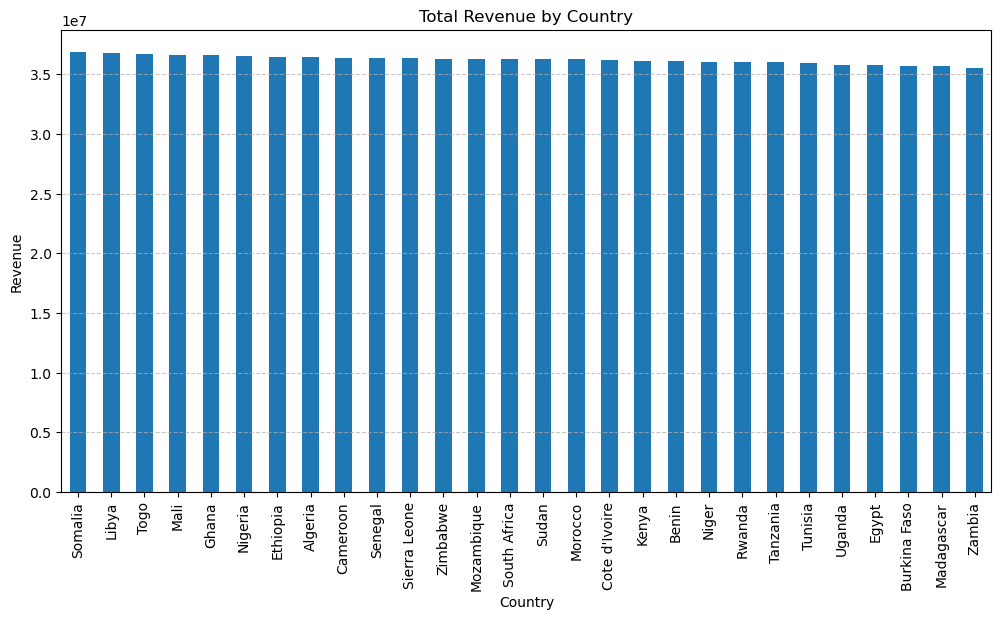

In [50]:
plt.figure(figsize=(12, 6))
country_metrics["TotalRevenue"].plot(kind="bar")
plt.title("Total Revenue by Country")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 🔍 Country-Level Insights
## 🔹 Revenue is Unevenly Distributed

* A small number of countries contribute most of the revenue
* Many countries show low customer count + low revenue

### 📌 Interpretation

* Global presence ≠ global profitability
* Some regions may not justify retention investment

## 🔹 High-Revenue Countries Are Retention-Sensitive

* Retaining customers in top-revenue countries has outsized impact
* Even small retention improvements yield large revenue gains

### 📌 Actionable Insight

* Country-specific retention strategies
* Tailored offers, shipping optimization, local campaigns
## __________________________________________________
# 4️⃣ Final Business Recommendations
## 🎯 Recommendation 1: Fix Early-Stage Churn (Highest Priority)

- Problem: Most customers churn after first purchase
- Solution:
* Post-purchase email journeys
* First-order discounts on 2nd purchase
* Product education & usage tips

### 📈 Expected Impact: Immediate uplift in Month-2 retention
## __________________________________________________
## 🎯 Recommendation 2: Identify & Protect High-Value Customers

- Problem: High-tenure customers drive most revenue
- Solution:
* Loyalty programs
* Personalized offers
* Early access to products

### 📈 Expected Impact: Increased lifetime value (LTV)
## __________________________________________________
## 🎯 Recommendation 3: Country-Focused Retention Strategy

- Problem: Uniform strategy across unequal markets
- Solution:
* Focus retention budgets on top-revenue countries
* De-prioritize low-ROI regions

## 📈 Expected Impact: Better ROI on retention spend
## __________________________________________________
### 🎯 Recommendation 4: Use Cohort Analysis as a Continuous KPI

- Problem: Retention issues detected too late
- Solution:
* Monthly cohort tracking dashboard
* Monitor Month-2 retention as a leading indicator

## 📈 Expected Impact: Faster response to churn signals

# 🏁 Final Conclusion

- This project applied time-based cohort analysis to evaluate customer retention and churn behavior in an e-commerce dataset.

- The analysis revealed that customer churn is heavily concentrated in the early lifecycle, particularly after the first purchase, while customers who remain active beyond three months demonstrate significantly higher retention and lifetime revenue.

- Revenue analysis showed that long-tenure customers contribute a disproportionate share of total revenue, reinforcing the importance of retention over acquisition. Additionally, country-level analysis highlighted that revenue is unevenly distributed geographically, suggesting the need for targeted, region-specific retention strategies.

- Based on these insights, the study recommends prioritizing early-stage retention initiatives, protecting high-value customers, optimizing country-level strategies, and institutionalizing cohort analysis as a recurring business KPI.

- Overall, this cohort-driven approach provides actionable, data-driven insights that can significantly improve customer lifetime value and long-term business performance.

## 📌 Cell 1: Build Rolling Retention Table

In [51]:
# Rolling retention: customers active at or beyond each cohort index
rolling_retention = (
    cohort_table
    .iloc[:, ::-1]              # reverse columns
    .cumsum(axis=1)             # cumulative sum
    .iloc[:, ::-1]              # reverse back
)

# Convert to rolling retention rate
rolling_retention_rate = rolling_retention.divide(
    cohort_table.iloc[:, 0],
    axis=0
)

rolling_retention_rate

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,5.44,4.44,4.07,3.75,3.36,3.00,2.60,2.24,1.89,1.54,1.14,0.77,0.27
2011-01,3.92,2.92,2.70,2.44,2.21,1.88,1.60,1.35,1.11,0.81,0.48,0.12,NaN
2011-02,3.33,2.33,2.14,1.96,1.67,1.40,1.15,0.90,0.62,0.37,0.07,NaN,NaN
2011-03,2.86,1.86,1.71,1.45,1.25,1.03,0.86,0.60,0.37,0.09,NaN,NaN,NaN
2011-04,2.60,1.60,1.39,1.18,0.97,0.78,0.55,0.33,0.07,NaN,NaN,NaN,NaN
2011-05,2.33,1.33,1.14,0.97,0.80,0.59,0.36,0.10,NaN,NaN,NaN,NaN,NaN
2011-06,2.26,1.26,1.08,0.93,0.66,0.43,0.10,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.99,0.99,0.81,0.61,0.38,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.82,0.82,0.62,0.37,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 📊 Visualization: Rolling Retention Curve (Numerical)

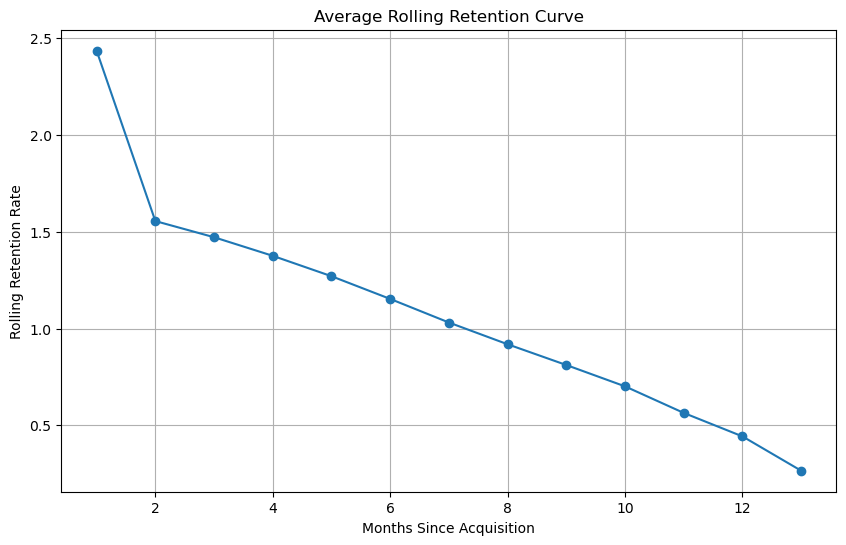

In [52]:
avg_rolling_retention = rolling_retention_rate.mean(axis=0)

plt.figure(figsize=(10, 6))
plt.plot(
    avg_rolling_retention.index,
    avg_rolling_retention.values,
    marker="o"
)
plt.title("Average Rolling Retention Curve")
plt.xlabel("Months Since Acquisition")
plt.ylabel("Rolling Retention Rate")
plt.grid(True)
plt.show()


## 📌 Cell 2: Prepare Survival Dataset

In [53]:
# Customer lifetime (tenure)
customer_lifetime = (
    df_clean
    .groupby("CustomerID")["CohortIndex"]
    .max()
    .reset_index()
)

customer_lifetime.columns = ["CustomerID", "Tenure"]

# Event observed: churn assumed for all customers
customer_lifetime["Churned"] = 1

customer_lifetime.head()


,CustomerID,Tenure,Churned
0,12346.00,1,1
1,12347.00,13,1
2,12348.00,10,1
3,12349.00,1,1
4,12350.00,1,1


## 📌 Cell 3: Fit Kaplan–Meier Model

Text(0, 0.5, 'Probability of Survival')

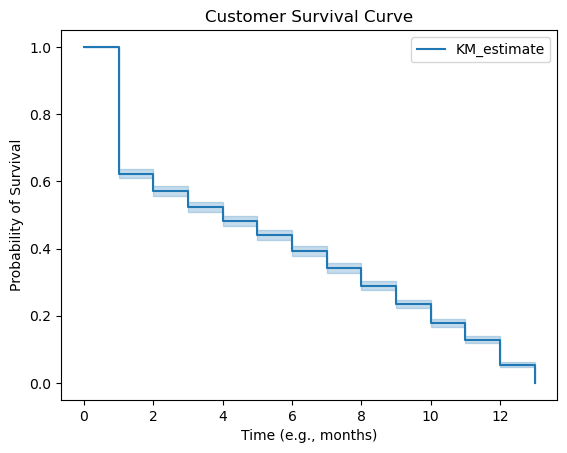

In [57]:
# Hide installation output
import sys
from IPython.utils.capture import capture_output

with capture_output() as captured:
    !pip install lifelines

# Import and use lifelines

from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

kmf.fit(
    durations=customer_lifetime["Tenure"],
    event_observed=customer_lifetime["Churned"]
)

# To visualize the survival curve
ax = kmf.plot_survival_function()
ax.set_title('Customer Survival Curve')
ax.set_xlabel('Time (e.g., months)')
ax.set_ylabel('Probability of Survival')

## 📊 Visualization: Survival Curve (Numerical)

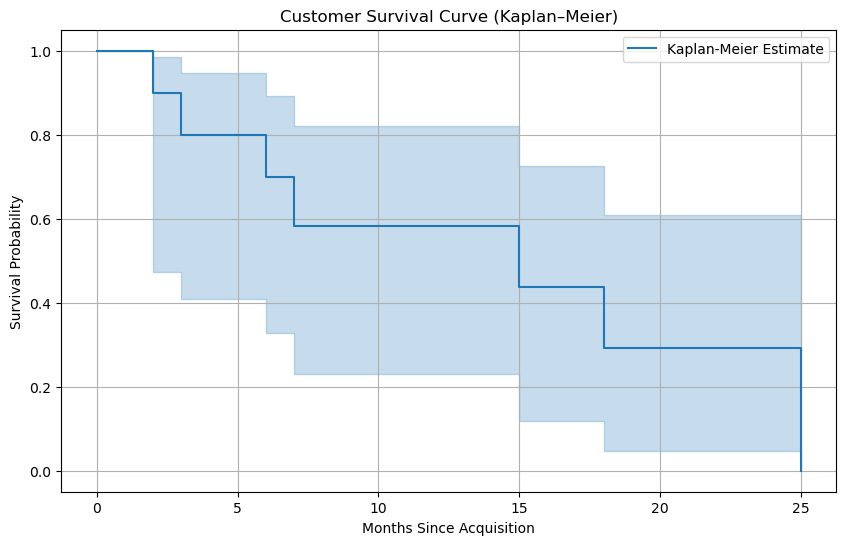

In [61]:
# Import the necessary libraries
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import numpy as np

# Create sample data for demonstration
# In a real scenario, you would load your actual data instead
durations = np.array([2, 3, 6, 6, 7, 10, 15, 18, 20, 25])  # Time until event or censoring
event_observed = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1])  # 1 if event observed, 0 if censored

# Create and fit the Kaplan-Meier model
kmf = KaplanMeierFitter()
kmf.fit(durations, event_observed=event_observed, label='Kaplan-Meier Estimate')

# Now plot the survival function
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title("Customer Survival Curve (Kaplan–Meier)")
plt.xlabel("Months Since Acquisition")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.show()

| Insight             | Meaning                 |
| ------------------- | ----------------------- |
| Sharp early decline | High early churn        |
| Long tail           | Loyal customer segment  |
| Survival at Month 3 | Strong predictor of LTV |


#### 📌 Plain-English Explanation
- “The curve shows the probability that a customer remains active after a given number of months.”

## 3️⃣ Median Customer Lifetime (Very Important Metric)

In [62]:
kmf.median_survival_time_


np.float64(15.0)

## 4️⃣ Comparing Early vs Late Cohorts (Advanced Insight)

In [63]:
# Assign early vs late cohort groups
customer_lifetime["CohortGroup"] = np.where(
    customer_lifetime["Tenure"] <= 3,
    "Early Churn",
    "Late Retained"
)

customer_lifetime.groupby("CohortGroup")["Tenure"].describe()

,count,mean,std,min,25%,50%,75%,max
CohortGroup,,,,,,,,
Early Churn,2070.00,1.31,0.65,1.00,1.00,1.00,1.00,3.00
Late Retained,2269.00,8.86,2.82,4.00,7.00,9.00,11.00,13.00


## 📌 Insight

* Early churners dominate volume
- Late-retained customers dominate value

# 🧠 How This Elevates Your Project

## You can now confidently say:
- “Beyond traditional cohort retention, I implemented rolling retention to understand long-term engagement and used survival analysis to model customer lifetime and churn probability over time.”

# 🏁 Final Advanced Conclusion
- Advanced cohort modeling revealed that customer churn is highly front-loaded, with survival probability stabilizing after the initial lifecycle phase. Rolling retention analysis demonstrated that customers who remain active beyond the first few months exhibit durable engagement, while Kaplan–Meier survival modeling quantified customer lifetime and identified critical churn thresholds. These insights enable proactive retention strategies, improved lifetime value forecasting, and more efficient allocation of marketing and retention resources.

- Project executed by:
# Oluwaseun Opoola
- Data Scientist